In [1]:
import pandas as pd
import geopandas as gpd

In [3]:
shootings = pd.read_csv("https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/v2/fatal-police-shootings-data.csv")

In [4]:
shootings.head()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23.0,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39.0,male,H,not_available,False,False,473


In [5]:
shootings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8166 entries, 0 to 8165
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          8166 non-null   int64  
 1   date                        8166 non-null   object 
 2   threat_type                 8163 non-null   object 
 3   flee_status                 7146 non-null   object 
 4   armed_with                  7956 non-null   object 
 5   city                        8157 non-null   object 
 6   county                      3310 non-null   object 
 7   state                       8166 non-null   object 
 8   latitude                    7300 non-null   float64
 9   longitude                   7300 non-null   float64
 10  location_precision          7300 non-null   object 
 11  name                        7679 non-null   object 
 12  age                         7637 non-null   float64
 13  gender                      8128 

In [18]:
# convert date to python datetime
shootings["date"] = pd.to_datetime(shootings["date"])

In [21]:
# convert to geodataframe
gdf = gpd.GeoDataFrame(
    shootings, geometry=gpd.points_from_xy(shootings.longitude, shootings.latitude))

<AxesSubplot: >

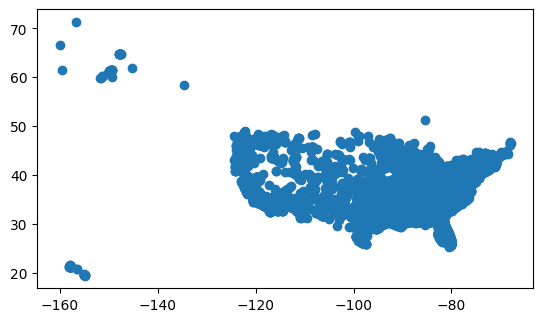

In [22]:
gdf.plot()

<AxesSubplot: >

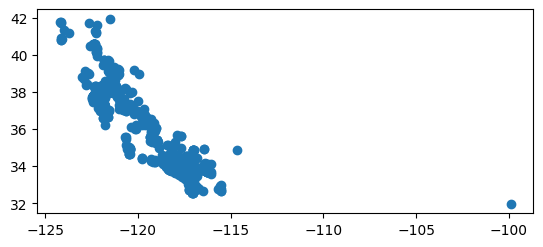

In [24]:
gdf[gdf.state == 'CA'].plot()

<AxesSubplot: >

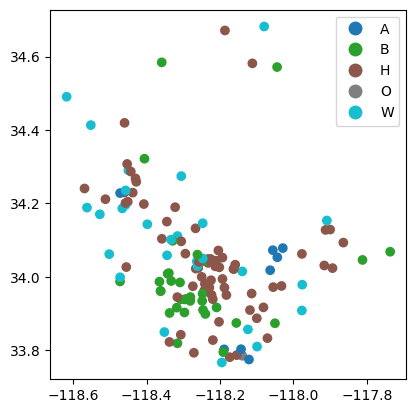

In [28]:
gdf[gdf.county == 'Los Angeles'].plot(column='race',legend=True)

In [19]:
shootings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8166 entries, 0 to 8165
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          8166 non-null   int64         
 1   date                        8166 non-null   datetime64[ns]
 2   threat_type                 8163 non-null   object        
 3   flee_status                 7146 non-null   object        
 4   armed_with                  7956 non-null   object        
 5   city                        8157 non-null   object        
 6   county                      3310 non-null   object        
 7   state                       8166 non-null   object        
 8   latitude                    7300 non-null   float64       
 9   longitude                   7300 non-null   float64       
 10  location_precision          7300 non-null   object        
 11  name                        7679 non-null   object      

In [20]:
shootings.sample()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
3150,3498,2018-03-11,flee,foot,gun,Fort Sumner,De Baca,NM,34.471784,-104.245508,not_available,Andy Lucero,48.0,male,H,not_available,False,False,81


In [17]:
for column in shootings.columns.to_list():
    print(shootings[column].value_counts().rename_axis('unique_values').reset_index(name='counts'))

      unique_values  counts
0                 3       1
1              5963       1
2              5975       1
3              5976       1
4              5959       1
...             ...     ...
8161           3006       1
8162           3004       1
8163           3003       1
8164           3023       1
8165           8891       1

[8166 rows x 2 columns]
     unique_values  counts
0       2019-01-28       9
1       2018-01-06       9
2       2018-02-01       9
3       2018-06-29       9
4       2018-04-01       9
...            ...     ...
2750    2017-11-20       1
2751    2017-11-16       1
2752    2021-07-02       1
2753    2021-07-05       1
2754    2023-01-25       1

[2755 rows x 2 columns]
  unique_values  counts
0         shoot    2293
1        threat    2144
2         point    1537
3        attack    1258
4          move     385
5  undetermined     334
6          flee     165
7      accident      47
  unique_values  counts
0           not    4487
1           car    1308
2 

In [16]:
print(shootings['state'].value_counts().rename_axis('unique_values').reset_index(name='counts'))
shootings['race'].value_counts().rename_axis('unique_values').reset_index(name='counts')

   unique_values  counts
0             CA    1172
1             TX     745
2             FL     516
3             AZ     368
4             GA     311
5             CO     297
6             OH     233
7             NC     231
8             OK     227
9             WA     224
10            TN     221
11            MO     213
12            NM     173
13            PA     168
14            IL     164
15            LA     160
16            AL     153
17            IN     150
18            NY     149
19            VA     146
20            KY     145
21            MI     139
22            NV     136
23            OR     133
24            SC     129
25            WI     126
26            AR     114
27            MD     111
28            MS     107
29            UT      97
30            NJ      92
31            MN      88
32            KS      79
33            WV      78
34            ID      66
35            MA      55
36            AK      54
37            MT      51
38            IA      50


,unique_values,counts
0,W,3622
1,B,1905
2,H,1286
3,A,141
4,N,109
5,O,20
6,B;H,1
